In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("yulu_bike_sharing_dataset.csv")

In [44]:
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Yulu is a bike-sharing platform that provides a sustainable and convenient mode of transportation in urban areas. The company aims to address the challenges of traffic congestion, pollution, and limited parking space by offering a fleet of shared bicycles that are easily accessible to the public.

Yulu operates on a dockless model, which means users can find and unlock bikes using a mobile app and drop them off at any convenient location within designated zones. This flexibility allows users to make short, point-to-point trips without the need for owning a personal bike or relying solely on public transportation.

The Yulu bikes are designed to be environmentally friendly, with electric-assist capabilities that make pedaling easier and reduce the effort required for riders. The platform incorporates advanced technology, including IoT devices and GPS tracking, to enable seamless bike locating, secure locking mechanisms, and efficient operations.

Yulu's mission goes beyond just providing bikes for rent; it aims to promote a sustainable and healthy lifestyle while contributing to the overall improvement of urban mobility. By encouraging people to choose eco-friendly transportation options, Yulu strives to create a positive impact on cities, reduce traffic congestion, and enhance the quality of life for urban dwellers.

Through collaborations with local governments, transportation authorities, and various stakeholders, Yulu aims to build a robust bike-sharing ecosystem that caters to the needs of commuters, tourists, and residents alike. The company continues to expand its operations, innovate its technology, and enhance the user experience to make urban transportation more efficient, affordable, and sustainable.

### Point to cover
The company want to know
which variable are significant in predicting the demand for shared electric cycles in the indan market?
how well varibale describe the electric demand

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# no null value vailable in the dataset & most of the datatype is int or float


Checking for outlier one by one

In [11]:
df['workingday'].value_counts()# 1 is working day & 0 is weekend

workingday
1    7412
0    3474
Name: count, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

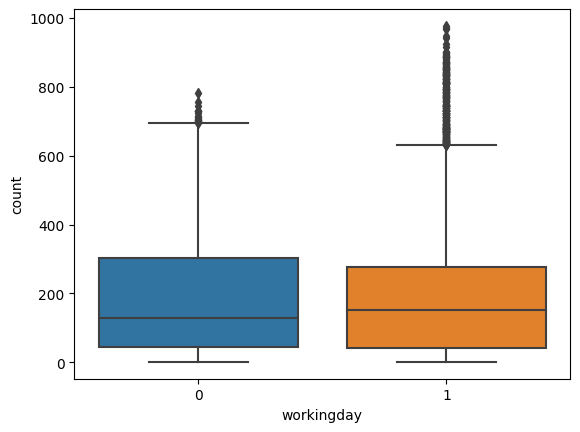

In [15]:
sns.boxplot(data = df,x='workingday',y='count')

As we can  see the is outlier in working day & weekend but the mean is almost the same
#### Removing the outlier by using the IOR 

In [16]:
q1= df['count'].quantile(0.25)
q2 = df['count'].quantile(0.75)
iqr = q2-q1

In [20]:
df = df[(df['count'] >(q1-1.5*iqr)) & (df['count']<(q2+1.5*iqr))]

In [22]:
df.shape

(10583, 12)

<Axes: xlabel='workingday', ylabel='count'>

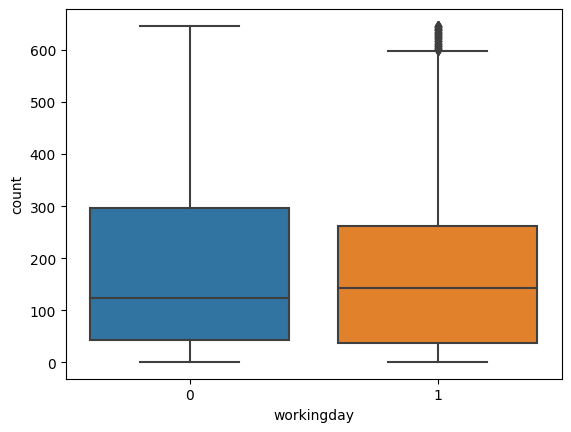

In [23]:
sns.boxplot(data = df,x='workingday',y='count')

As we can see even after removing the outlier the  mean for both weekday & weekend is almost the same 

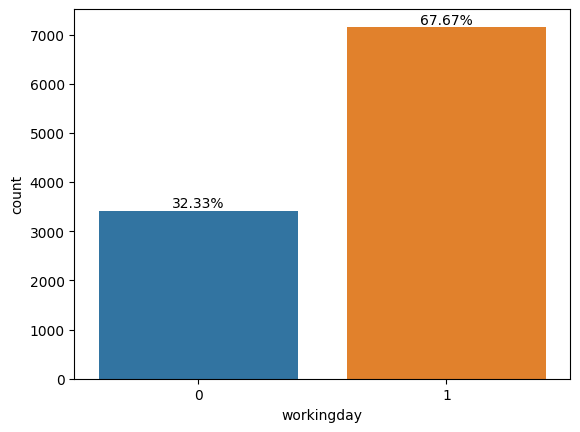

In [26]:

# Create the countplot
ax = sns.countplot(data=df, x='workingday')

# Calculate the percentage values
total = len(df['workingday'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Display the plot
plt.show()

but as per this graph working day have more sales but  the mean for both are the same so we have to check for hypothesis testing 

#### need to check  using statistical method using the t-test 
##### Step 1 Define the null & alternative hypotheses
ho : the count on weekday is equal to the count on weekend
ha : The count on weekday is not equal to  the count on weekend
using 1-side tails test
the signifiance value is 0.05


In [27]:
weekday = df[df['workingday']==1]['count'].sample(3422)
weekend = df[df['workingday']==0]['count'].sample(3422)


In [29]:
print(f'The mean for the weekday is {weekday.std()}')
print(f'The mean for the weekday is {weekend.std()}')


The mean for the weekday is 151.0714604674673
The mean for the weekday is 163.78216646075998


Calculating the p-value


In [31]:
from scipy.stats import ttest_ind
test_stat,p_value = ttest_ind(weekday,weekend,equal_var = False,alternative = 'greater')
print('The print value is',p_value)

The print value is 0.9766750963054303


as the  per the value we can clearly say the  we are reject to accpet and it the we can say that the business for weekday & weekend is almost the same 

In [33]:
#checking for weather 

In [34]:
df['weather'].value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

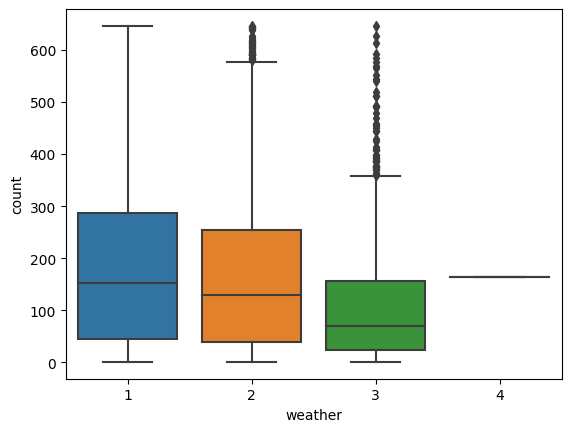

In [35]:
sns.boxplot(data=df,x='weather',y='count')

as can we see we can say that the the more outlier on the weather 3  it is also have the 2nd lowest number 850 we so not good to remove the outlier also the mean is  have difference still check droping the 4

In [46]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2 = df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)


In [48]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


step 1: dEFIRE THE NULL AND ALTERNATIVE HYP
HO : The mean count is different weather are equal
Ha ; the count is different weather are different 

In [50]:
from scipy.stats import f_oneway

test_stat ,p_value = f_oneway(w1,w2,w3)
p_value

4.511450193231624e-27

In [51]:
if p_value <0.5:
    print('as the p_value is less then significant value we can say that we reject the null hyp')
else:
    print('we fail to reject the  hyp ')

as the p_value is less then significant value we can say that we reject the null hyp


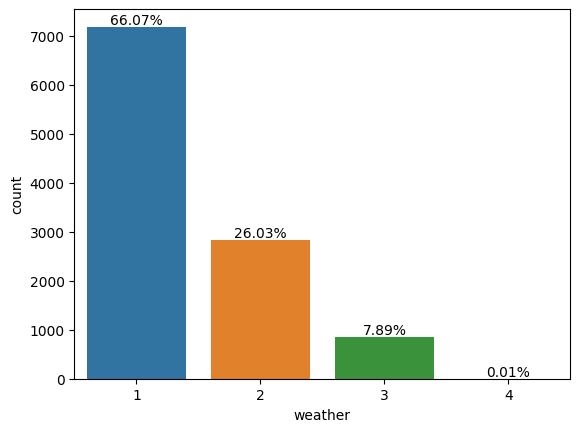

In [53]:
ax = sns.countplot(data=df, x='weather')

# Calculate the percentage values
total = len(df['weather'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Display the plot
plt.show()

we can say that most of the sales that 66.07% is come by 1 weather follow by 2 & then 3 



### checking the correlation

In [70]:
data = df

In [77]:
column = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

In [78]:
numeric_df = data[column]

corr_matrix = numeric_df.corr()


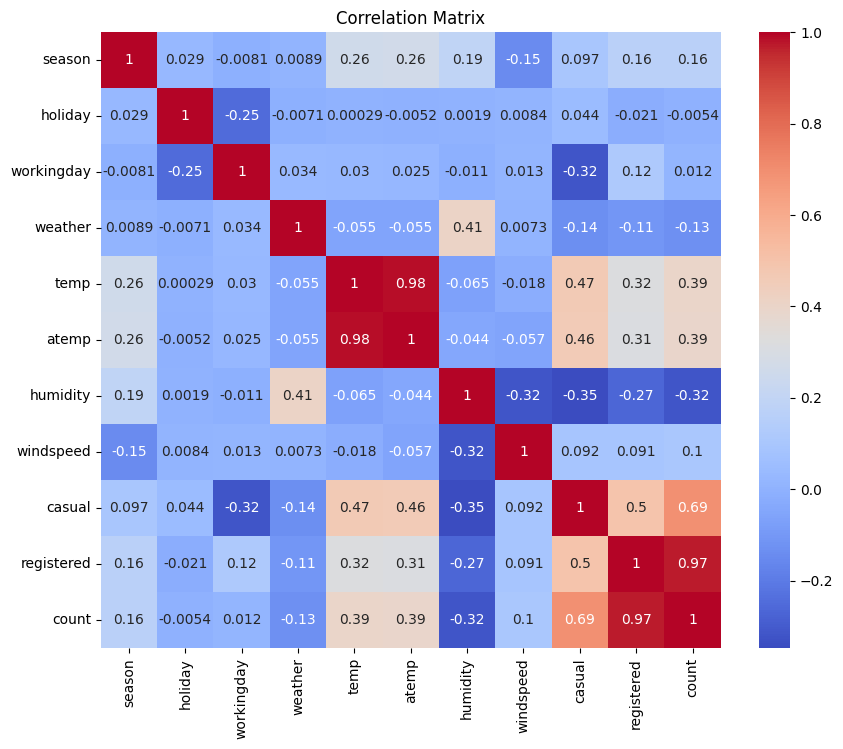

In [79]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [82]:
bins = [0,6,16,25,35,40]
labels = ['very cold','cold','normal','hot','veryhot']
df['temp'] = pd.cut(df['temp'],bins,labels=labels)

<Axes: xlabel='temp', ylabel='count'>

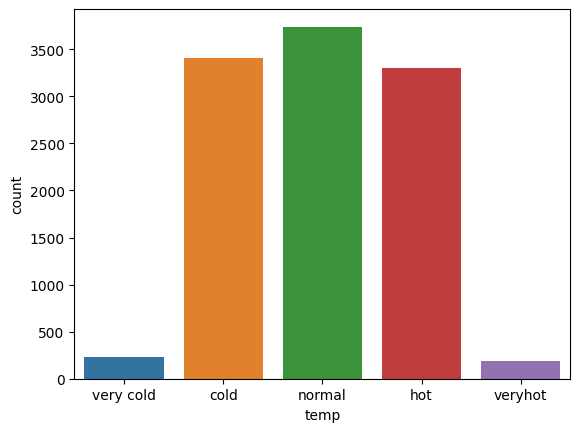

In [85]:
sns.countplot(data=df,x='temp')

In [88]:
df['casual']

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

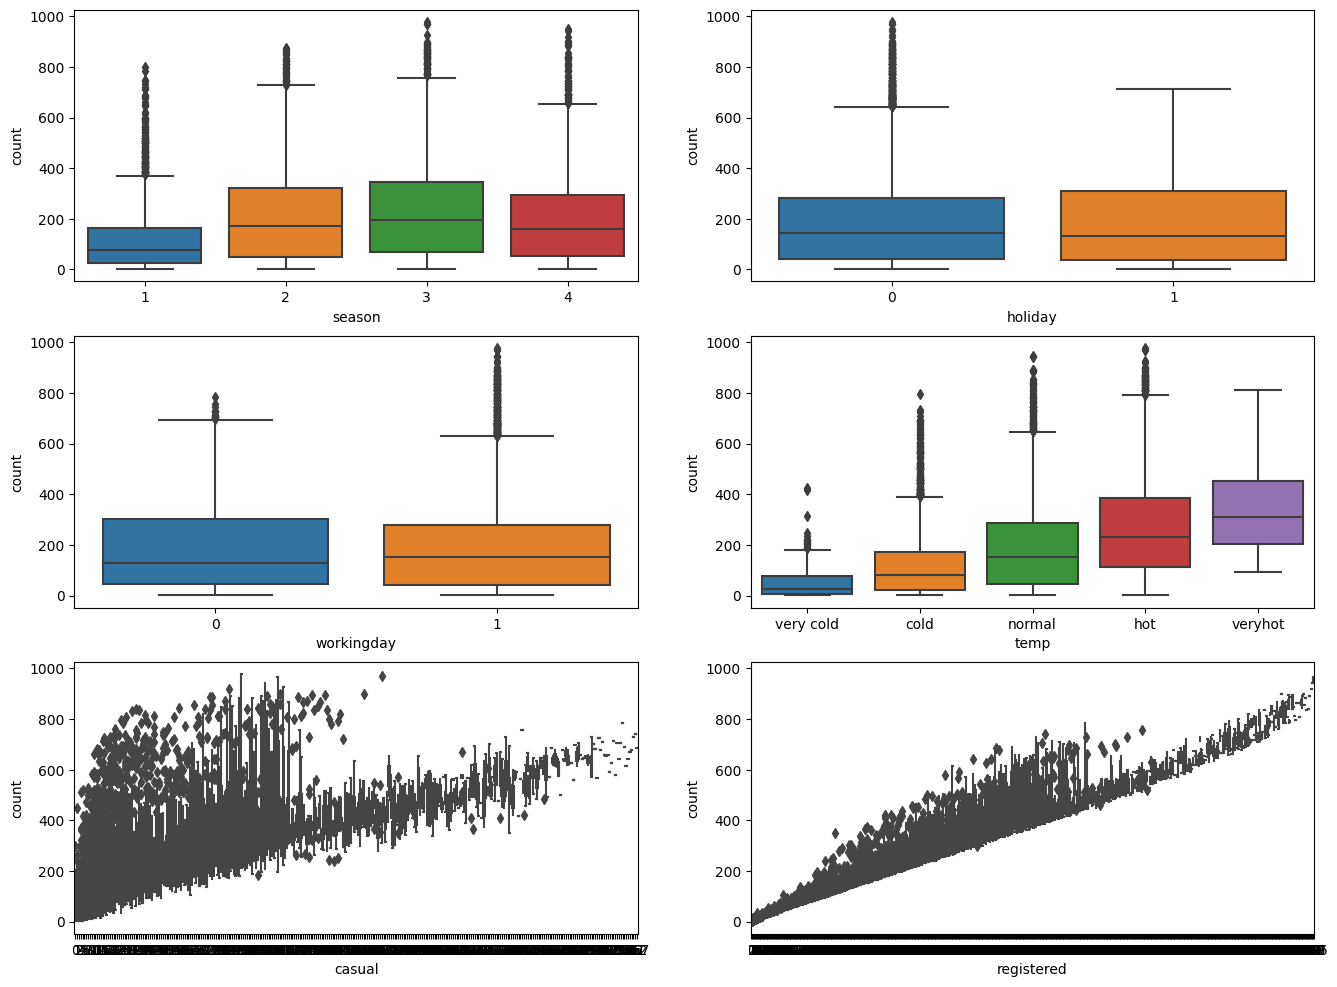

In [94]:
column = ['season', 'holiday', 'workingday', 'temp']
fig,axes= plt.subplots(nrows=3,ncols=2,figsize=(16, 12))
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df,x=column[count],y='count',ax=axes[i,j])
        count +=1

In [64]:
def avg_meanrange(x,y):
    for j in range(len(y)):
        mean_1 = [df[df[x]==y[j]].sample(100,replace=True)['count'].mean()for i  in range(200)]
        confidence_interval = np.percentile(mean_1,[2.50,97.50])
        
        print('The Average Mean of',y[j],np.mean(mean_1))
        print(f"The Avg Mean of {y[j]} between {confidence_interval[0]} & {confidence_interval[1]}")

In [65]:
x = 'weather'
y = [1,2,3,4]
avg_meanrange(x,y)

The Average Mean of 1 206.19145
The Avg Mean of 1 between 165.76825 & 238.38975000000002
The Average Mean of 2 179.3631
The Avg Mean of 2 between 149.41424999999998 & 209.346
The Average Mean of 3 119.2764
The Avg Mean of 3 between 96.55075 & 147.10075
The Average Mean of 4 164.0
The Avg Mean of 4 between 164.0 & 164.0
